In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
df = pd.read_csv('./weatherHistory.csv')


In [8]:
print(df.head())


                  Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13  

In [9]:
print(df.dtypes)


Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object


In [10]:
print(df.describe())


       Temperature (C)  Apparent Temperature (C)      Humidity  \
count     96453.000000              96453.000000  96453.000000   
mean         11.932678                 10.855029      0.734899   
std           9.551546                 10.696847      0.195473   
min         -21.822222                -27.716667      0.000000   
25%           4.688889                  2.311111      0.600000   
50%          12.000000                 12.000000      0.780000   
75%          18.838889                 18.838889      0.890000   
max          39.905556                 39.344444      1.000000   

       Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
count       96453.000000            96453.000000     96453.000000     96453.0   
mean           10.810640              187.509232        10.347325         0.0   
std             6.913571              107.383428         4.192123         0.0   
min             0.000000                0.000000         0.000000         0.0   


In [11]:
print(df.isnull().sum())
df = df.dropna()  # Or use df.fillna(method='ffill') or other methods


Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64


In [23]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], errors='coerce')


In [28]:
df['Month'] = df['Formatted Date'].dt.month
df['Year'] = df['Formatted Date'].dt.year
numeric_cols = df.select_dtypes(include=['number']).columns
monthly_avg = df.groupby(['Year', 'Month'])[numeric_cols].mean()
print(monthly_avg)





              Temperature (C)  Apparent Temperature (C)  Humidity  \
Year   Month                                                        
2006.0 3.0          12.137273                 11.328645  0.700071   
       4.0          12.625872                 12.083819  0.729528   
       5.0          15.665315                 15.555600  0.720968   
       6.0          19.326991                 19.506744  0.746972   
       7.0          23.580608                 23.587291  0.656384   
...                       ...                       ...       ...   
2016.0 6.0          21.297886                 21.451489  0.733250   
       7.0          22.782325                 22.836343  0.669556   
       8.0          21.433998                 21.396797  0.674516   
       9.0          18.478465                 18.366373  0.688069   
       10.0         10.601392                  9.837797  0.828231   

              Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  \
Year   Month              

In [30]:
hottest_day = df.loc[df['Temperature (C)'].idxmax()]
coldest_day = df.loc[df['Temperature (C)'].idxmin()]
print("Hottest Day:\n", hottest_day)
print("Coldest Day:\n", coldest_day)

Hottest Day:
 Formatted Date                             2007-07-22 15:00:00+02:00
Summary                                                        Clear
Precip Type                                                     rain
Temperature (C)                                            39.905556
Apparent Temperature (C)                                   37.538889
Humidity                                                        0.13
Wind Speed (km/h)                                            23.5865
Wind Bearing (degrees)                                         250.0
Visibility (km)                                                9.982
Loud Cover                                                       0.0
Pressure (millibars)                                         1007.55
Daily Summary               Partly cloudy starting in the afternoon.
Month                                                            7.0
Year                                                          2007.0
Name: 12759, dtype: 

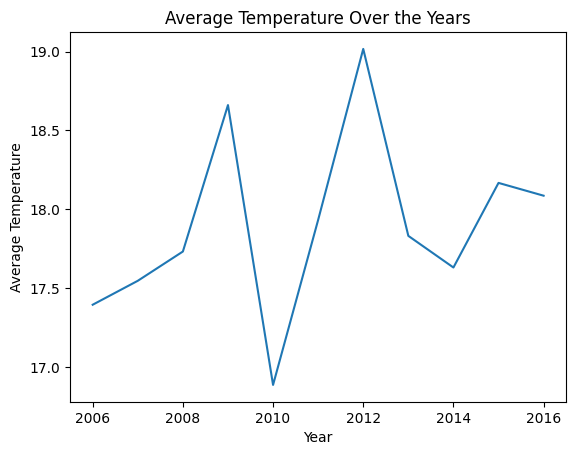

In [32]:
df.groupby('Year')['Temperature (C)'].mean().plot(kind='line')
plt.title('Average Temperature Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.show()


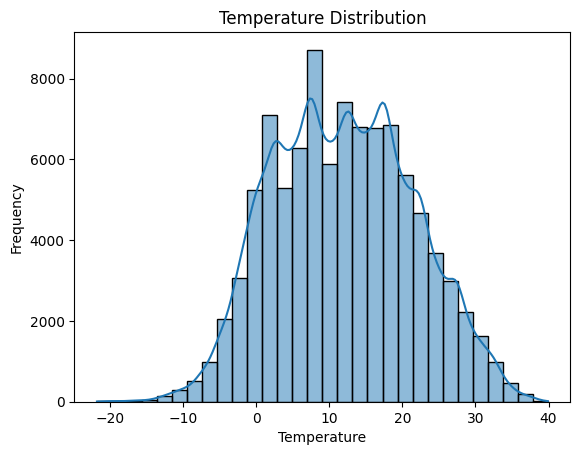

In [33]:
sns.histplot(df['Temperature (C)'], bins=30, kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()


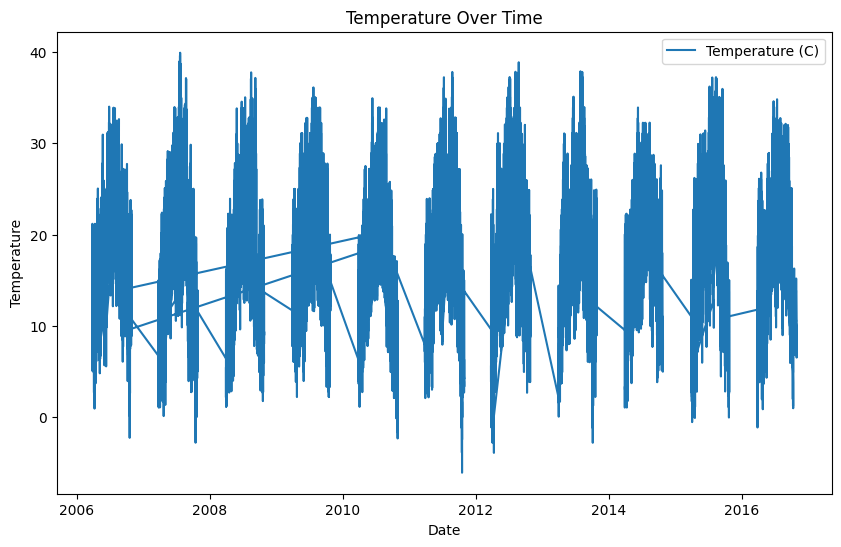

In [43]:
df['Formatted Date'] = df['Formatted Date'].dt.tz_localize(None)
plt.figure(figsize=(10, 6))
plt.plot(df['Formatted Date'], df['Temperature (C)'], label='Temperature (C)')
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()


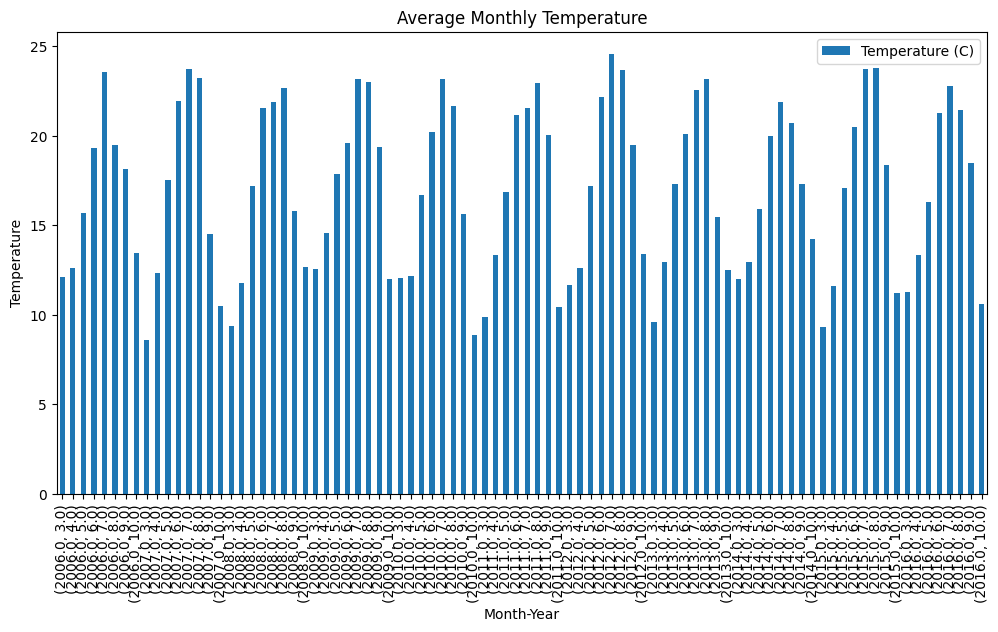

In [45]:
monthly_avg.plot(kind='bar', y='Temperature (C)', figsize=(12, 6))
plt.title('Average Monthly Temperature')
plt.xlabel('Month-Year')
plt.ylabel('Temperature')
plt.show()
